In [1]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from sklearn.cross_validation import train_test_split
import numpy

C:\Users\Aishwarya\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
from nltk import pos_tag, word_tokenize

def remove_weird_char(string):
    import re
    string = string.lower()
    words = string.split()
    refined = []
    for i in words:
        refined.append(re.sub("[^\w]+", " ", i))
    sentence = ' '.join([word for word in refined])
    return(sentence)

In [9]:
from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")
def rmStopWords(text):
        text = ' '.join([word for word in text.split() if word not in cachedStopWords])
        return(text)
    
def rep_punct(text):
    return text.lower().replace('.',' ').replace('!',' ').replace(',',' ').replace('?',' ').replace(')',' ').replace('(',' ')

In [17]:
airlines_tweets= pandas.read_csv("Airline Tweets.csv")
# Tweet.head()

In [12]:
airlines_tweets["text_clean"] = airlines_tweets["text"].apply(remove_weird_char)

In [16]:
tweet_details = airlines_tweets["text_clean"].str.cat(sep=" ")
tweet_details_clean = rmStopWords(tweet_details)

### Wordcloud

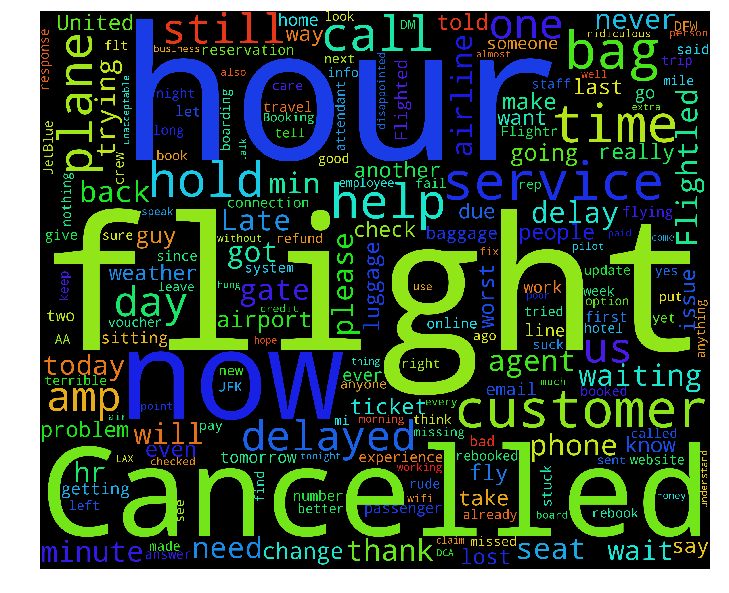

In [3]:
from wordcloud import WordCloud,STOPWORDS
df=Tweet[Tweet['airline_sentiment']=='negative']
words = ' '.join(df['text'])

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Sentiments by airline

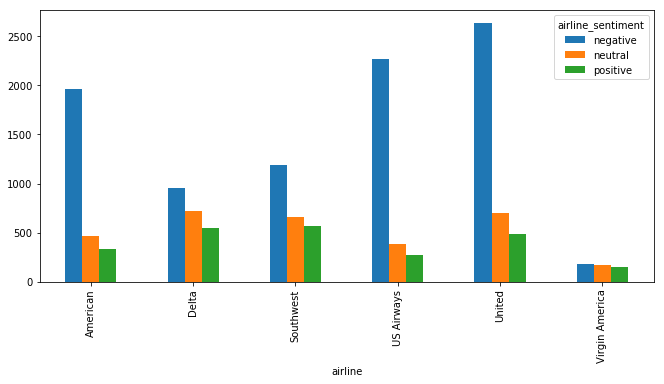

In [19]:
airlines_tweets.groupby(['airline', 'airline_sentiment']).size().unstack().plot(kind='bar',figsize=(11, 5))

## VADER Analyses

In [20]:
!pip install vaderSentiment

In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [76]:
def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)
#     print("{:-<40} {}".format(sentence, str(snt)))
    return snt['compound']

In [104]:
def print_sentiment(score):
    if score>0.5:
        return 'positive'
        i = i+1
    elif (score>=0.0) & (score < 0.5):
        return 'neutral'
        i = i+1
    elif score<0.0:
        return 'negative'

In [119]:
# Test
print print_sentiment_scores('I have to work on a saturday!')
print print_sentiment_scores('I have to work on a saturday! smh')
print print_sentiment_scores('I have to work on a saturday! SMH')

0.0
-0.3802
-0.5147


In [81]:
airlines_tweets["text_clean"] = airlines_tweets["text"].apply(remove_weird_char)
airlines_tweets['text_clean'] = airlines_tweets['text_clean'].apply(rmStopWords)

In [101]:
airlines_tweets['VADER Compound score'] = airlines_tweets['text_clean'].apply(print_sentiment_scores)

In [105]:
airlines_tweets['Predicted sentiment'] = airlines_tweets['VADER Compound score'].apply(print_sentiment)

In [106]:
airlines_tweets[['text_clean','VADER Compound score','airline_sentiment','Predicted sentiment']][:10]

,text_clean,VADER Compound score,airline_sentiment,Predicted sentiment
0,virginamerica dhepburn said,0.0000,neutral,neutral
1,virginamerica plus added commercials experienc...,0.0000,positive,neutral
2,virginamerica today must mean need take anothe...,0.0000,neutral,neutral
3,virginamerica really aggressive blast obnoxiou...,-0.3306,negative,negative
4,virginamerica really big bad thing,-0.5829,negative,negative
5,virginamerica seriously would pay 30 flight se...,-0.6240,negative,negative
6,virginamerica yes nearly every time fly vx ear...,0.4019,positive,neutral
7,virginamerica really missed prime opportunity ...,0.1458,neutral,neutral
8,virginamerica well _but,0.2732,positive,neutral
9,virginamerica amazing arrived hour early good,0.7717,positive,positive
